# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
mat['y']

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

#### 3. Create a DataFrame with the features and target

In [ ]:
# crea df

,x1,x2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [ ]:
# info del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      51 non-null     float64
 1   x2      51 non-null     float64
 2   y       51 non-null     uint8  
dtypes: float64(2), uint8(1)
memory usage: 999.0 bytes


In [ ]:
# describe del df

,x1,x2,y
count,51.000000,51.000000,51.000000
mean,2.268780,3.132512,0.411765
std,0.928531,0.753256,0.497050
min,0.086405,1.617700,0.000000
25%,1.572550,2.636000,0.000000
50%,2.275300,3.070900,0.000000
75%,2.955050,3.531400,1.000000
max,4.015000,4.616200,1.000000


In [ ]:
# value counts de las clases normalizado

y
0    0.588235
1    0.411765
Name: proportion, dtype: float64

#### 4. Plot a scatterplot with the data

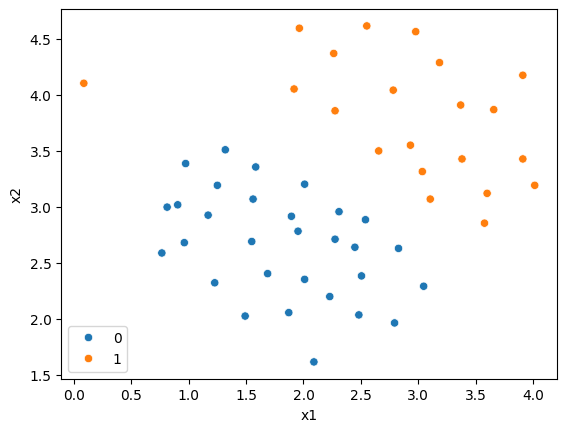

In [ ]:


# pinta un scatter con los puntos y el color según la y
# pon la leyenda abajo a la izquierda

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [ ]:
# no hace falta separar en train y en test por simplicidad
# entrena el modelo con X, y
# calcula el score por defecto del modelo



0.9803921568627451

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [ ]:
# equivalente a lo anterior pero subiendo el hiperparámetro C

1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [ ]:
# obtén la función de decisión del modelo

array([ 0.80326804,  0.38418881,  1.37789741,  0.52136793,  0.33344668,
        0.86880332,  0.68668657,  1.61151592,  0.8347857 ,  1.1675593 ,
        1.07350294,  0.22990319,  0.33215004,  0.79619096,  0.3159919 ,
        1.27443713,  1.21044245,  1.00012841,  0.56484289,  0.39004284,
       -0.43503823, -0.30865113, -0.68614681, -0.5539268 , -0.33236558,
       -0.29377084, -0.4407047 , -0.98403332, -0.68560547, -1.3285136 ,
       -1.0037668 , -1.49228339, -0.61128121, -0.68327196, -0.99994223,
       -1.15270604, -1.57845099, -1.35588523, -1.03225185, -1.184879  ,
       -0.77117024, -0.76672544, -0.46623739, -1.        , -0.51025602,
       -0.85869754, -1.55915293, -0.25476475, -1.11348144, -1.54711262,
       -0.70955424])

<Axes: xlabel='x1', ylabel='x2'>

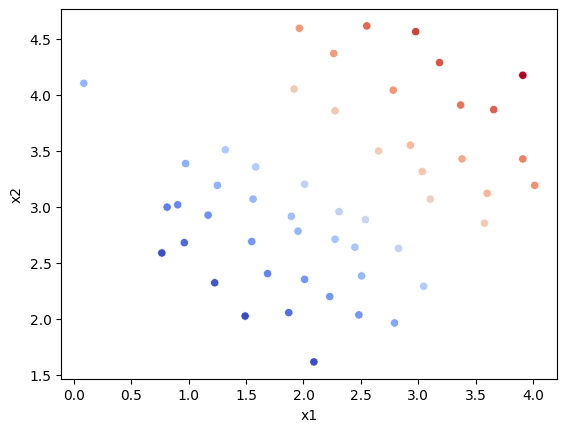

In [ ]:


# usa un scatter para pintar los puntos, usa en el parámetro c del scatterplot la función de decisión
# el color puede ser "coolwarm"

#### 9. Do the same with the second model

In [ ]:
# equivalente pero con el segundo modelo

array([ 12.00369109,   6.08408803,  15.14525606,   5.40157108,
         1.00006795,   5.67733945,   5.76050326,  14.62258543,
         9.5426901 ,  14.18602447,  10.27282906,   1.43481383,
         6.71601736,  10.88725885,   3.9822321 ,  13.23262567,
        10.86085387,   7.55390756,   3.59594868,   3.52500297,
        -0.99984855,  -1.01088777,  -5.17640231,  -4.76212158,
        -2.32002177,  -3.66459051,  -6.11992106, -10.45133743,
        -7.08045708, -12.32482425,  -9.04760546, -11.98946687,
        -4.11185225,  -3.79005419,  -7.41157401,  -9.65553422,
       -13.90114114,  -9.49738729,  -6.47174438,  -7.00278762,
        -2.77681527,  -3.6805826 ,  -0.44513333,  -9.760235  ,
        -4.85448856, -10.07692381, -15.74758678,  -2.21873086,
        -6.49581132, -11.03174573,   1.        ])

<Axes: xlabel='x1', ylabel='x2'>

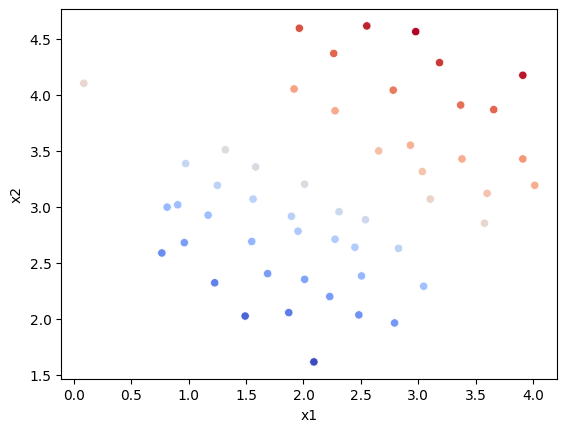

In [ ]:
# equivalente con el segundo modelo

y = ax1 + bx2 + c

0 = ax1 + bx2 + c

x2 = -ax1/b - c/b

In [ ]:
# coeficientes del segundo modelo

array([[3.38442027, 9.46275484]])

In [ ]:
# intercept del segundo modelo

array([-38.13230809])

In [19]:
a = svc_2.coef_[0][0]
b = svc_2.coef_[0][1]
c = svc_2.intercept_

In [20]:
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

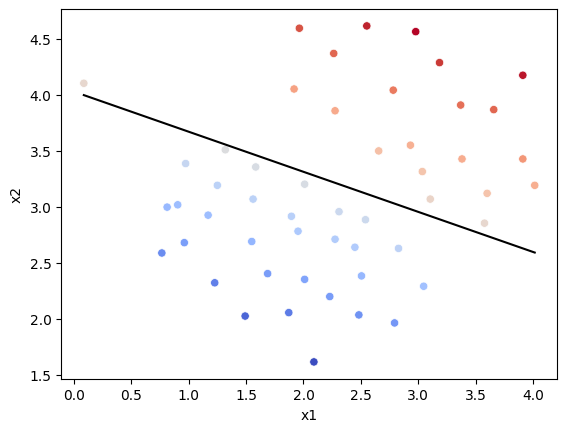

In [ ]:


# pinta los puntos con su nivel de confianza
# añade la recta que es la frontera de separación

In [22]:
a = svc_1.coef_[0][0]
b = svc_1.coef_[0][1]
c = svc_1.intercept_
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

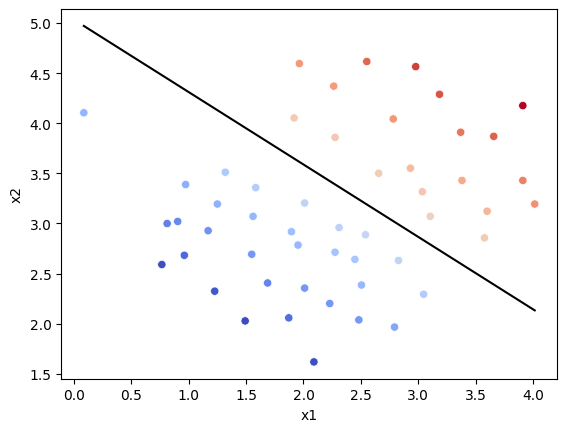

In [ ]:
# equivalente con el modelo 1

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [ ]:
# descarga los datos y mira sus claves

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Create a DataFrame with the features and target

In [ ]:
# crea el df
# muestra su head

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [ ]:
# la info del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      863 non-null    float64
 1   x2      863 non-null    float64
 2   y       863 non-null    uint8  
dtypes: float64(2), uint8(1)
memory usage: 14.5 KB


In [ ]:
# describe del df

,x1,x2,y
count,863.000000,863.000000,863.000000
mean,0.503414,0.694304,0.556199
std,0.254967,0.158884,0.497120
min,0.044931,0.402632,0.000000
25%,0.292627,0.557018,0.000000
50%,0.512673,0.693713,1.000000
75%,0.699309,0.830409,1.000000
max,0.998848,0.988596,1.000000


#### 3. Plot a scatterplot with the data

<Axes: xlabel='x1', ylabel='x2'>

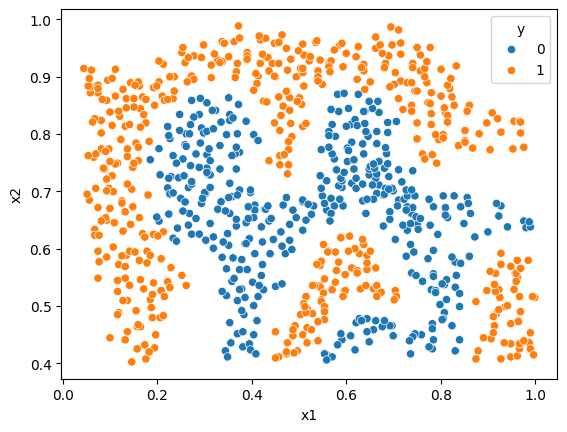

In [ ]:
# scatterplot y en hue la y

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

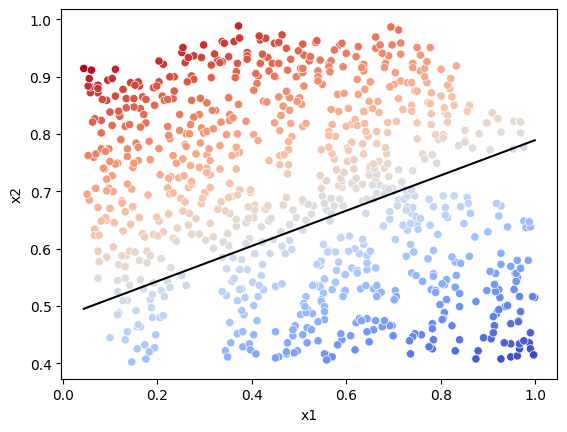

In [ ]:
# haz un svc con C = 1, loss = "hinge" y max_iter = 10000
# entrénalo y calcula su score por defecto



a = svc_3.coef_[0][0]
b = svc_3.coef_[0][1]
c = svc_3.intercept_
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

# saca el nivel de confianza
# pinta un scatter con ese nivel de confianza y color "coolwarm"
# pinta la frontera de separación de las clases




#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


#### 5. Fit the classifier and get the score

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [ ]:
# pista: tienes que obtener la probabilidad de ser 0

array([[3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       ...,
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00]], shape=(863, 2))

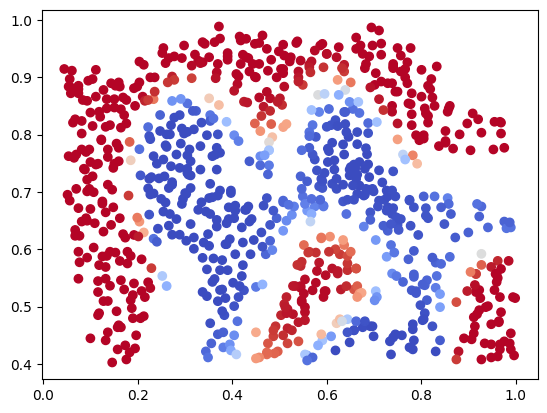

In [ ]:
# haz un scatter para los puntos y pon el color según la probabilidad de ser 1

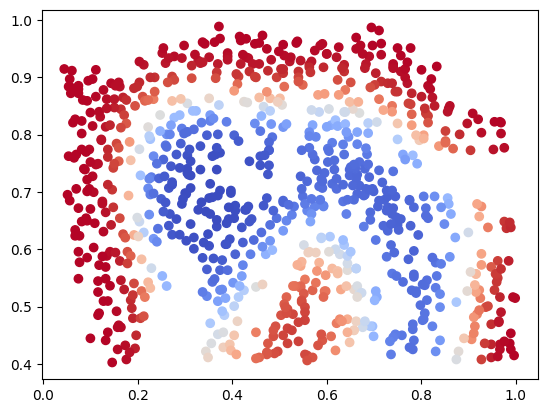

In [ ]:
svc_5 = SVC(C=1, gamma=10, probability=True)
svc_5.fit(X, y)
svc_5.score(X, y)
y_pred_proba = svc_5.predict_proba(X)
plt.scatter(df['x1'], df['x2'], c=y_pred_proba[:,1], cmap="coolwarm")

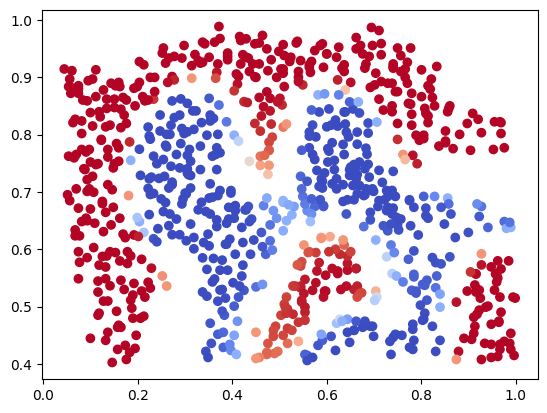

In [ ]:
svc_6 = SVC(C=10000, gamma=10, probability=True)
# equivalente

In [ ]:

# importa train_test_split y GridSearchCV
# divide en train y en test con semilla de 42 y 20% para el test


<Axes: xlabel='x1', ylabel='x2'>

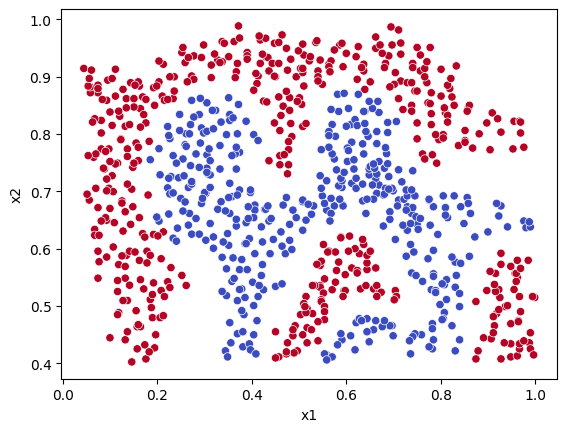

In [ ]:

# haz un scatter con todo X, el color viene de y y el color es "coolwarm"

<Axes: xlabel='x1', ylabel='x2'>

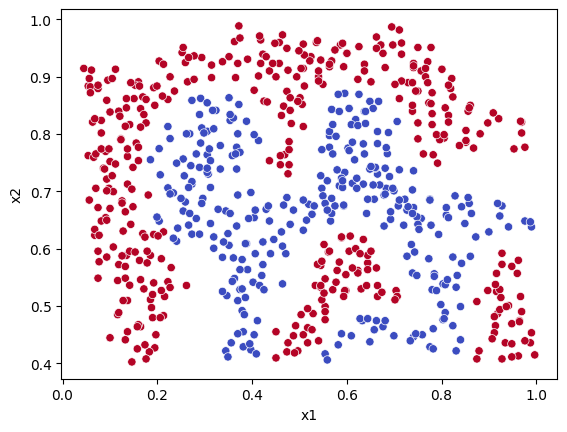

In [ ]:
# equivalente con X train

<Axes: xlabel='x1', ylabel='x2'>

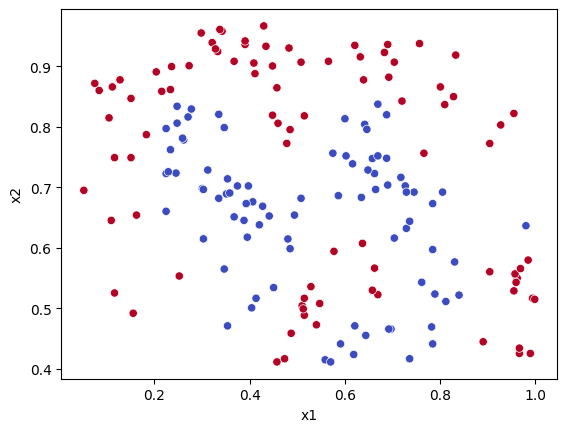

In [ ]:
# equivalente con X test

In [ ]:
# hiperparámetros: kernel rbf, kernel polynomial, C puede valer 1, 10, 50, 100

# haz un gridsearchcv con 5 folds, scoring accuracy y verbose 2, entrénalo con train



print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.1s
[CV] END ...................................C=1, kernel=poly; total time=   0.1s
[CV] END ...................................C=1, kernel=poly; total time=   0.1s
[CV] END ...................................C=1, kernel=poly; total time=   0.2s
[CV] END ...................................C=1, kernel=poly; total time=   0.2s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10,

In [ ]:
# mira el score en test

0.9421965317919075

In [ ]:
# usa pickle y guarda el estimador GridsearchCV en un archivo

In [ ]:
# lee usando pickle el archivo

In [45]:
modelo_importado

SVC(C=100, probability=True)

In [ ]:
# predice [1,3] 

c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=uint8)

In [ ]:


# Obtén las probabilidades de ser 1 en test

<Axes: xlabel='x1', ylabel='x2'>

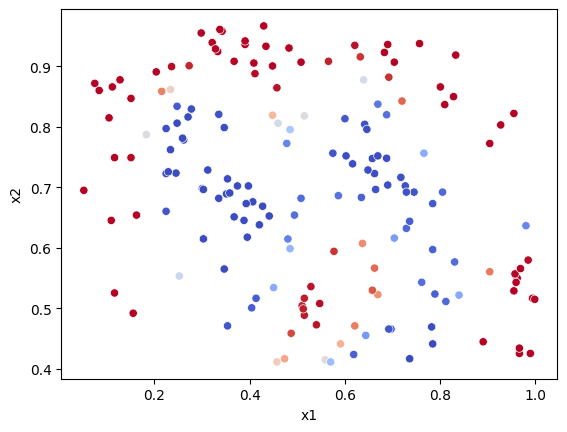

In [ ]:
# haz un scatterplot y pinta esos puntos de test con sus probabilidades de ser 1

In [ ]:
# EXTRA

# usa pipeline y PolynomialFeatures
# prueba grados de 2 a 6
# el hiperparámetro C del svc entre -1 y 2, 5 valor espaciados logarítmicamente
# 5 folds
# scoring accuracy


print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

final_model = gs.best_estimator_
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=4; total time=   0.0s
[CV] END ............classifier__C=0.1, polynom

0.8323699421965318

In [ ]:
# con pipelines y GridSearchCV
# polynomial puede ser grado 2, 3 o Ninguno
# C del svc espaciado logarítmico entre -1 y 2, 5 valores
# el kernel del svc lineal o gaussiano

# 5 folds, scoring accuracy, verbose 2



print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

final_model = gs.best_estimator_
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(degree=3); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(degree=3); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(degree=3); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, pol

0.9248554913294798